#  PARKINSONS DISEASE EXPLORATORY ANALYSIS AND VISUALIZATION

Parkinson's disease (PD), or simply Parkinson's, is a long-term degenerative disorder of the central nervous system that mainly affects the motor system. As the disease worsens, non-motor symptoms become more common.The symptoms usually emerge slowly.Early in the disease, the most obvious symptoms are shaking, rigidity, slowness of movement, and difficulty with walking.Thinking and behavioral problems may also occur. Dementia becomes common in the advanced stages of the disease. Depression and anxiety are also common, occurring in more than a third of people with PD. Other symptoms include sensory, sleep, and emotional problems.The main motor symptoms are collectively called "parkinsonism", or a "parkinsonian syndrome".

The cause of Parkinson's disease is unknown, but is believed to involve both genetic and environmental factors.

The data used in this analysis was generously provided by the researchers that made the papers below. Check them out for further information on the Parkinsons disease and their researches

'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)

Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 
'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', 
IEEE Transactions on Biomedical Engineering (to appear).

The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals

Let's get started

Importing relevant packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import lightgbm

Using TensorFlow backend.


Import the parkinsons data and have a glimpse at it

In [2]:
df= pd.read_csv('parkinsons.data')

df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Take a look at the columns and various data types

In [3]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [4]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

Since we have no categorical columns in our data we will go to directly check for nulls and then make our exploratory analysis

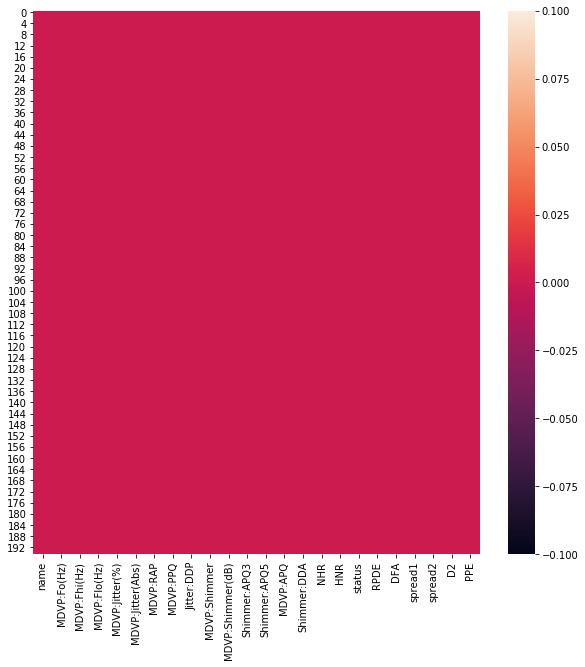

In [5]:
#Checking for nulls and handling them
fig = plt.figure(figsize=(10, 10)) 
sns.heatmap(df.isnull())

Since we have no nulls let us obtain the summary statistics for the dataframe, using the .describe() function.

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


A brief browse over the summary statistics points to the fact that our data is somewhat normally distributted. We will test this further.

Let us make some univariate Analysis on our data

1. Univariate Analysis of the Target Variable( Status)

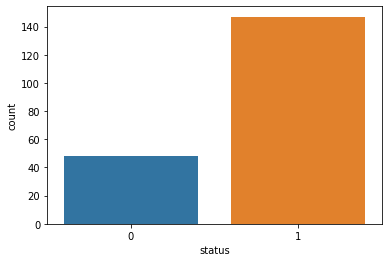

In [7]:
sns.countplot(df['status'])

We note that the target variable is skewed towards people with parkinsons disease. In this case since the data set is imbalanced we will undertake measures to try and balance it with synthetic samples through over sampling or under sampling.

2. Bivariate Analysis of the variables

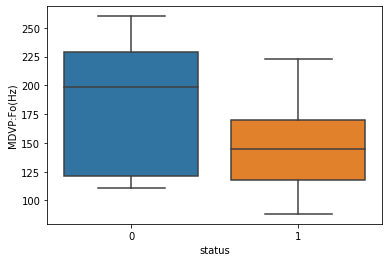

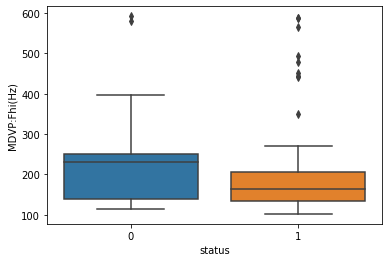

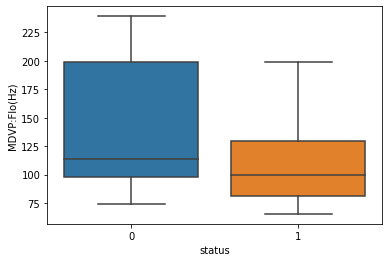

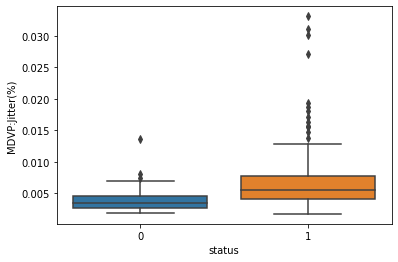

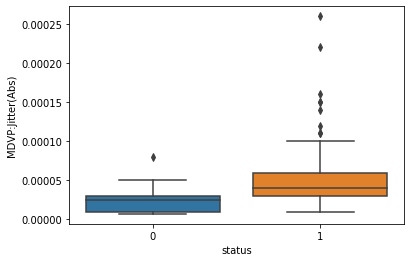

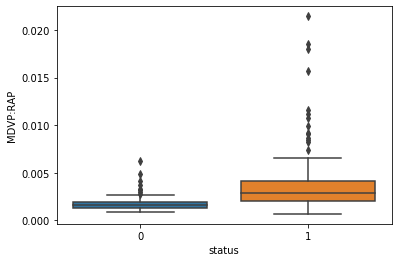

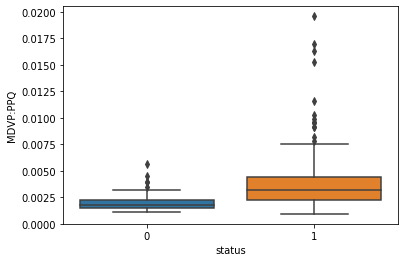

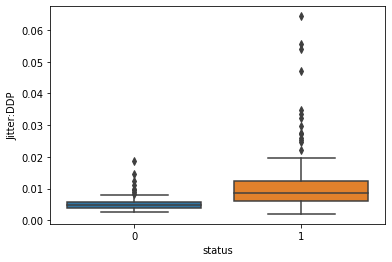

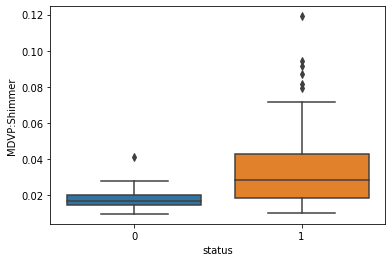

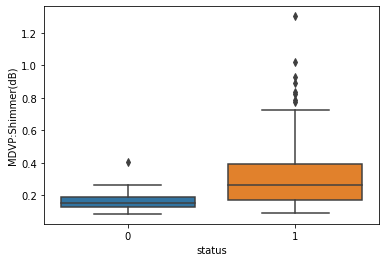

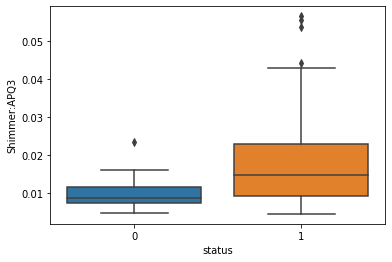

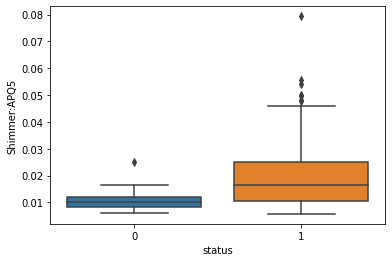

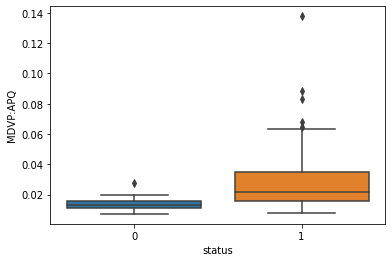

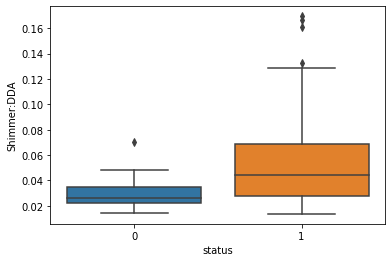

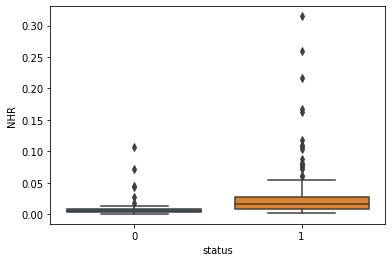

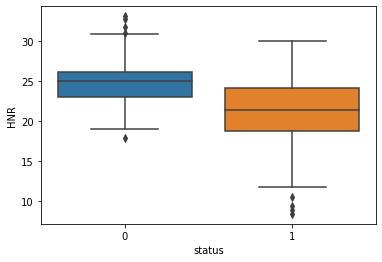

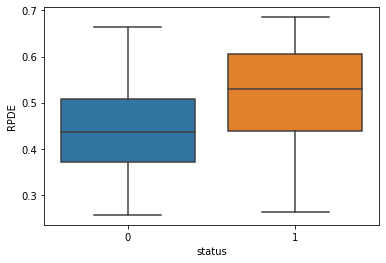

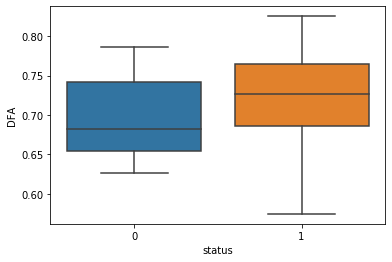

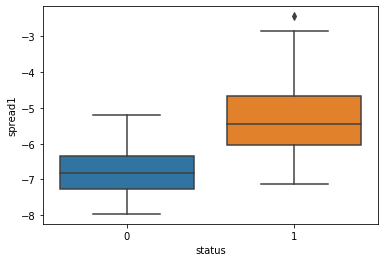

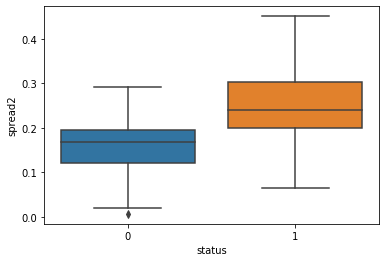

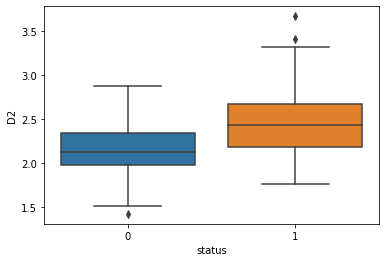

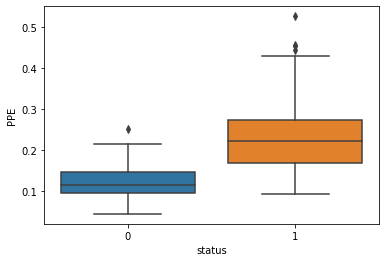

In [8]:
cols=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

for col in cols:
    sns.boxplot(df['status'],df[col])
    plt.show()

From the Bivariate Analysis we note that all features are significant with regards to our target variable, and as such all features will be used in futher endeavours.

Next let us look at how the variables or Features relate to each other with a pair plot

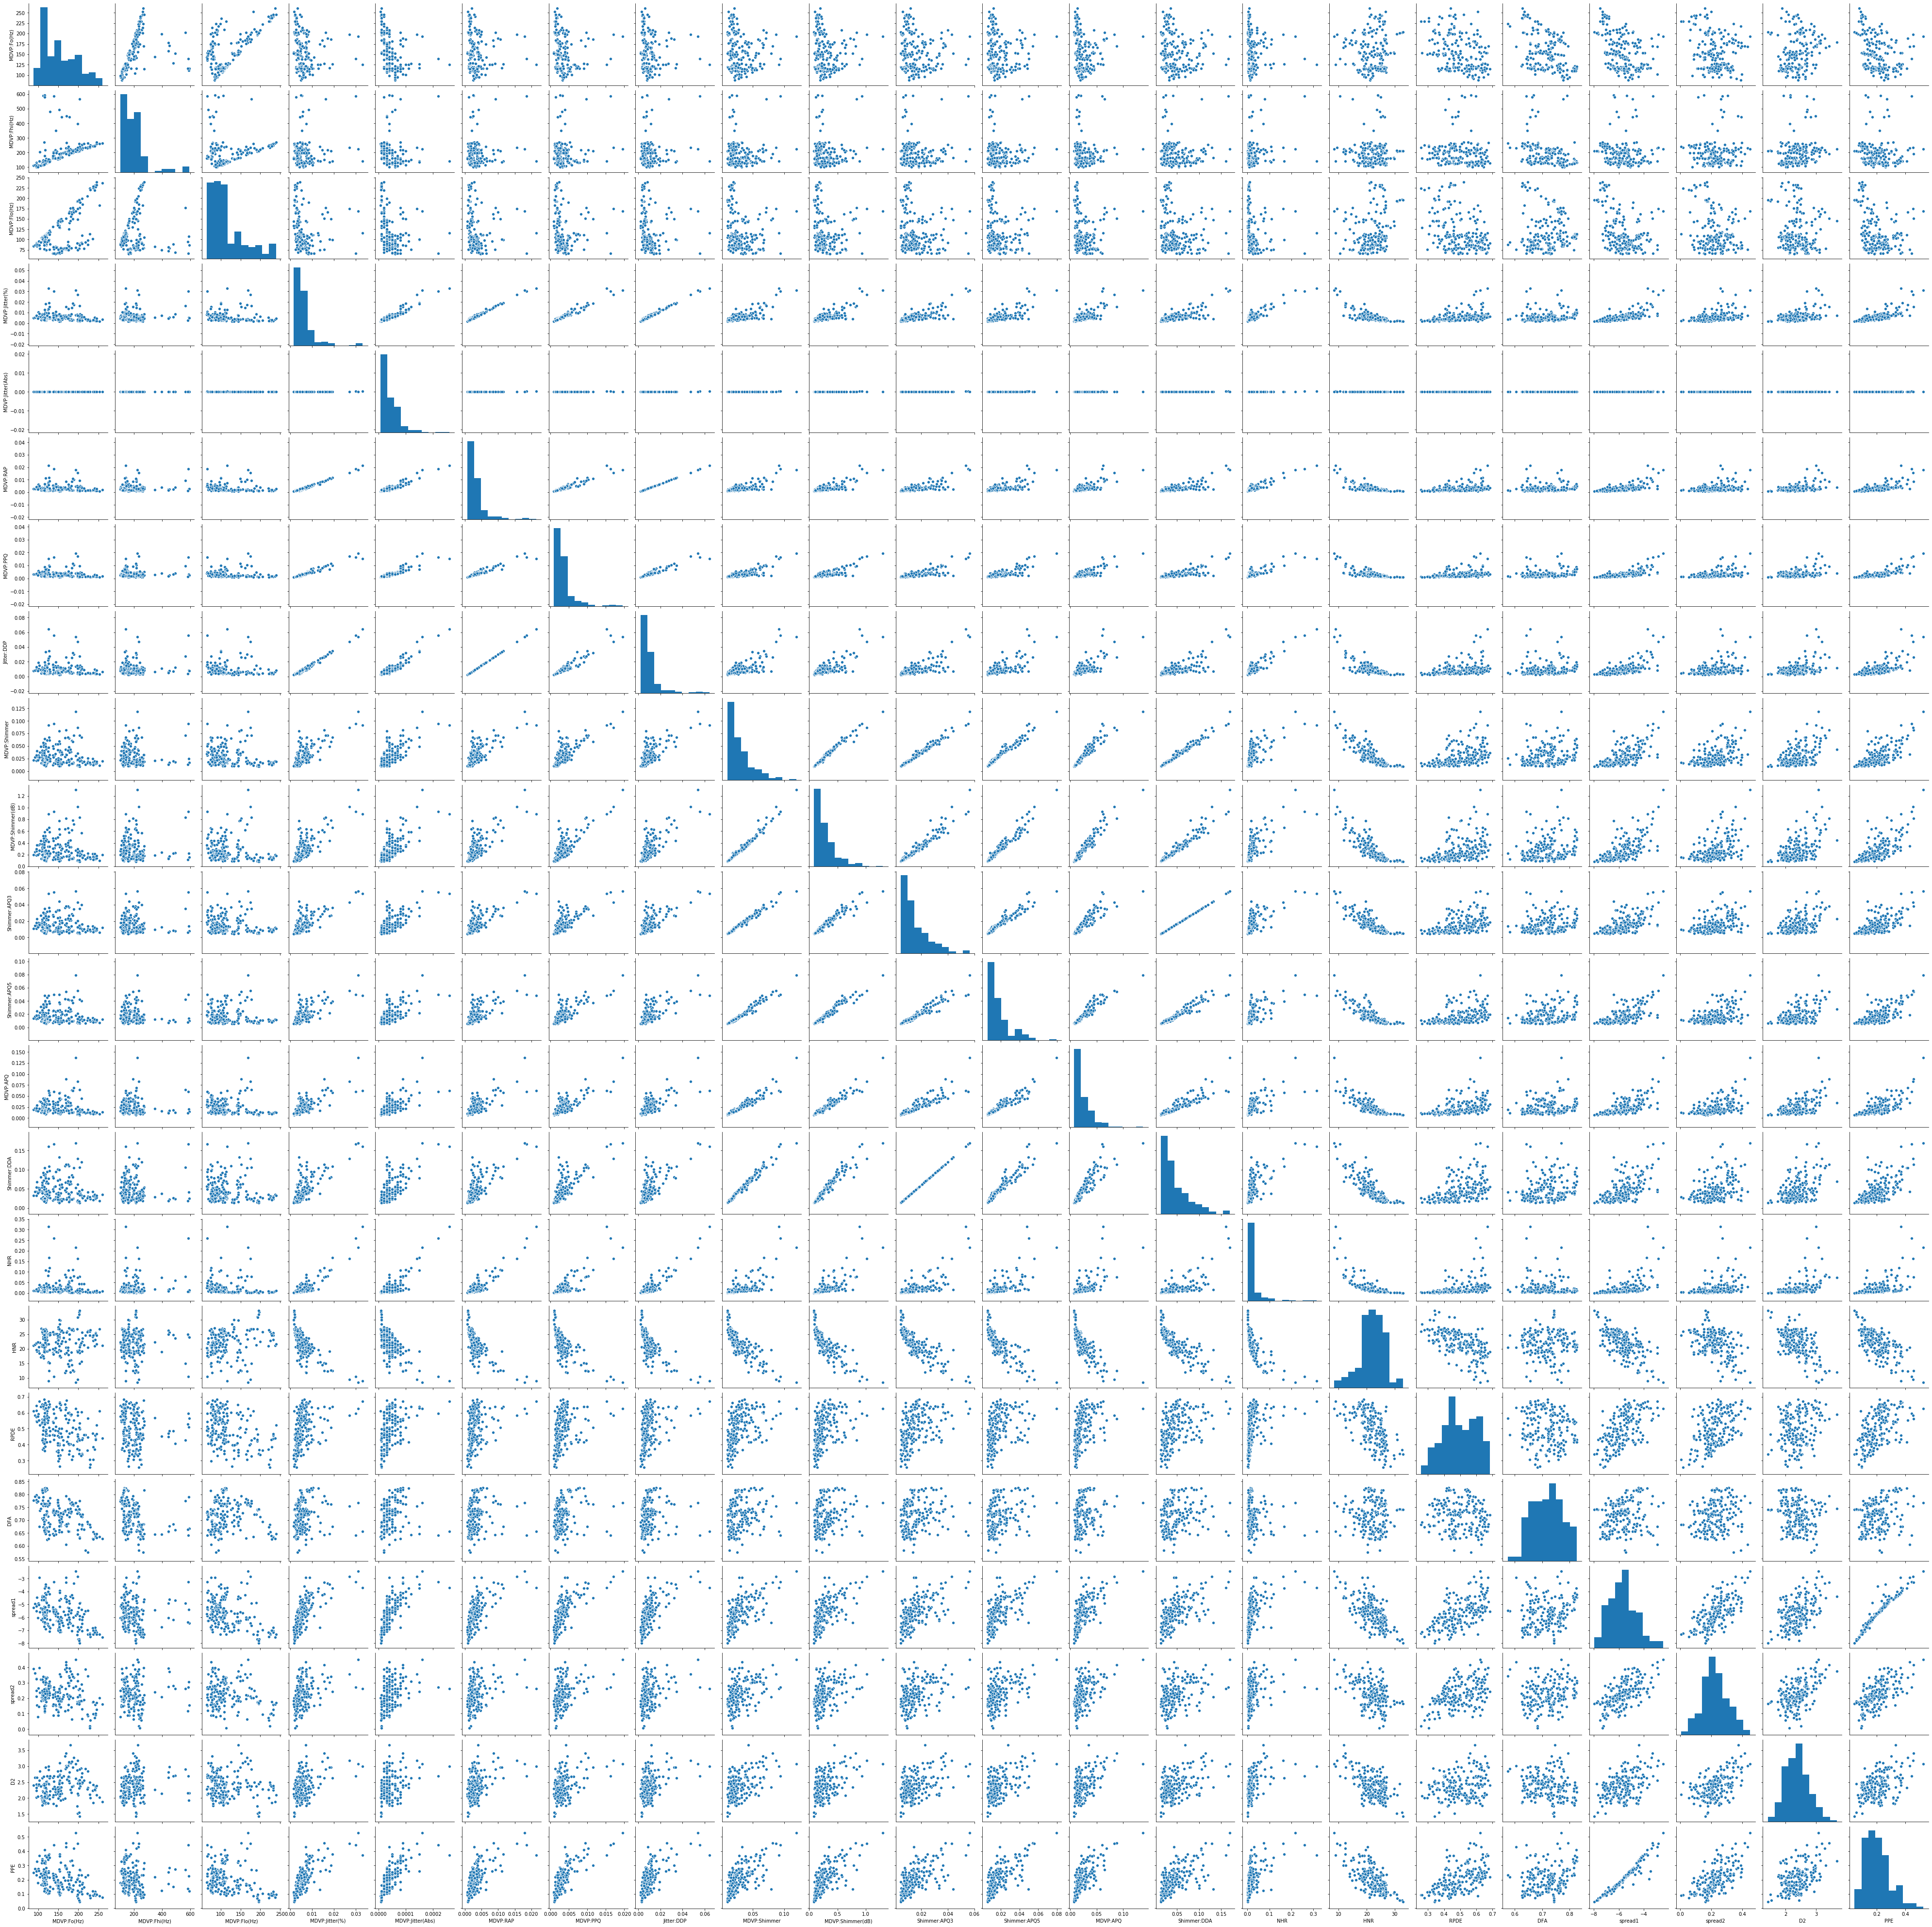

In [9]:
sns.pairplot(df[cols])

We note that almost all features  are positively correlated with each other.
The feature HNR is negatively correlated with the other features.
The feature MDVP:Jitter(Abs) has a horizontal line and as such is not correlated with the other variables.

Next we will look at three questions we can answer from the exploratory analysis we just concluded.

1. Is a patients ratio of noise to tonal components a significant factor in identifying the presence of Parkinsons disease

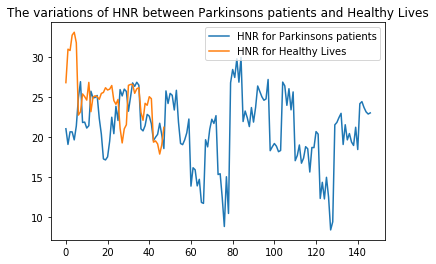

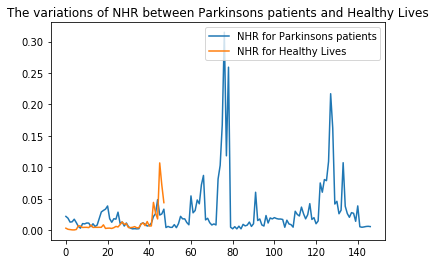

In [10]:
fig,ax = plt.subplots() 
ax.plot(np.arange(len(df[df['status']==1]['HNR'])),df[df['status']==1]['HNR'],label="HNR for Parkinsons patients")
ax.plot(np.arange(len(df[df['status']==0]['HNR'])),df[df['status']==0]['HNR'],label="HNR for Healthy Lives")

plt.title("The variations of HNR between Parkinsons patients and Healthy Lives")

plt.legend()
plt.show()

fig,ax1 = plt.subplots() 
ax1.plot(np.arange(len(df[df['status']==1]['NHR'])),df[df['status']==1]['NHR'],label="NHR for Parkinsons patients")
ax1.plot(np.arange(len(df[df['status']==0]['NHR'])),df[df['status']==0]['NHR'],label="NHR for Healthy Lives")

plt.title("The variations of NHR between Parkinsons patients and Healthy Lives")
plt.legend()
plt.show()

In [11]:
From the Analysis we can deduce that the HNR and NHR have rather different coreelations with the status of the patient.
The higher ones HNR the lower the risk of having parkinsons disease on the other hand the lower the NHR the 
lower the risk of having parkinsons disease.
In conclusion the ratio of noise to tonal components is a significant factor in identifying the presence 
of Parkinsons disease

SyntaxError: invalid syntax (<ipython-input-11-c36fcd5edfaa>, line 1)

In [ ]:
2. Is a patients vocal fundamental frequency a significant factor in identifying the presence of Parkinsons disease

In [ ]:
fig,ax = plt.subplots() 
ax.plot(np.arange(len(df[df['status']==1]['MDVP:Fo(Hz)'])),df[df['status']==1]['MDVP:Fo(Hz)'],label="Avg vocal fundamental frequency")
ax.plot(np.arange(len(df[df['status']==1]['MDVP:Fhi(Hz)'])),df[df['status']==1]['MDVP:Fhi(Hz)'],label="Max vocal fundamental frequency")
ax.plot(np.arange(len(df[df['status']==1]['MDVP:Flo(Hz)'])),df[df['status']==1]['MDVP:Flo(Hz)'],label="Min vocal fundamental frequency")

plt.title("The variations of vocal fundamental frequency between Parkinsons patients")

plt.legend()
plt.show()

fig,ax1 = plt.subplots() 
ax1.plot(np.arange(len(df[df['status']==0]['MDVP:Fo(Hz)'])),df[df['status']==0]['MDVP:Fo(Hz)'],label="Avg vocal fundamental frequency")
ax1.plot(np.arange(len(df[df['status']==0]['MDVP:Fhi(Hz)'])),df[df['status']==0]['MDVP:Fhi(Hz)'],label="Max vocal fundamental frequency")
ax1.plot(np.arange(len(df[df['status']==0]['MDVP:Flo(Hz)'])),df[df['status']==0]['MDVP:Flo(Hz)'],label="Min vocal fundamental frequency")

plt.title("The variations of vocal fundamental frequency between Healthy Lives")
plt.legend()
plt.show()

We realise that vocal fundamental frequency is usually normal with the range 100 and 300 and having one out of that range on average could point to presence of the Parkinsons disease.

3. Is a patients variation in amplitude a significant factor in identifying the presence of Parkinsons disease

In [ ]:
fig,ax = plt.subplots() 
ax.plot(np.arange(len(df[df['status']==1]['MDVP:Shimmer'])),df[df['status']==1]['MDVP:Shimmer'],label="MDVP:Shimmer")
ax.plot(np.arange(len(df[df['status']==1]['Shimmer:APQ3'])),df[df['status']==1]['Shimmer:APQ3'],label="Shimmer:APQ3")
ax.plot(np.arange(len(df[df['status']==1]['Shimmer:APQ5'])),df[df['status']==1]['Shimmer:APQ5'],label="Shimmer:APQ5")
ax.plot(np.arange(len(df[df['status']==1]['MDVP:APQ'])),df[df['status']==1]['MDVP:APQ'],label="MDVP:APQ")
#ax.plot(np.arange(len(df[df['status']==1]['Shimmer:DDA'])),df[df['status']==1]['Shimmer:DDA'],label="Shimmer:DDA")

plt.title("The variations in amplitude between Parkinsons patients")

plt.legend()
plt.show()

fig,ax = plt.subplots() 
ax.plot(np.arange(len(df[df['status']==0]['MDVP:Shimmer'])),df[df['status']==0]['MDVP:Shimmer'],label="MDVP:Shimmer")
ax.plot(np.arange(len(df[df['status']==0]['Shimmer:APQ3'])),df[df['status']==0]['Shimmer:APQ3'],label="Shimmer:APQ3")
ax.plot(np.arange(len(df[df['status']==0]['Shimmer:APQ5'])),df[df['status']==0]['Shimmer:APQ5'],label="Shimmer:APQ5")
ax.plot(np.arange(len(df[df['status']==0]['MDVP:APQ'])),df[df['status']==0]['MDVP:APQ'],label="MDVP:APQ")
#ax.plot(np.arange(len(df[df['status']==0]['Shimmer:DDA'])),df[df['status']==0]['Shimmer:DDA'],label="Shimmer:DDA")

plt.title("The variations in amplitude between Healthy Lives")

plt.legend()
plt.show()

In [ ]:
We can note from the graphs above that the variations in amplitudes for healthy lives are very low on average 
compared to those of the patients. This in turn provides a great feature to detect Parkinsons disease

Since we are done with Exploratory analysis, we will head into data pre processing. 

In [ ]:
#dropping unnecessary columns
target=df['status']
df.drop(['name','status'],inplace=True,axis=1)

In [ ]:
#Scaling or normalising the data
feature_scaler = StandardScaler()
df = feature_scaler.fit_transform(df)

In [ ]:
#Spliting the train and validation data
seed=3245
xTrain, xTest, yTrain, yTest = train_test_split(df,target, test_size = 0.2, random_state = seed)

#Over sampling the minority class
xTrain, yTrain = RandomOverSampler().fit_resample(xTrain, yTrain)

In [ ]:
#Applying model
lgb_model = lightgbm.LGBMClassifier(max_depth=5, objective='binary',num_leaves= 16,n_estimators=100,learning_rate= 0.07, seed=seed)

#fitting the model
lgb_model.fit(xTrain, yTrain)

# make predictions for test data
y_pred = lgb_model.predict(xTest)
y_pred = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(yTest, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

F1_SCORE = f1_score(yTest, y_pred)
print("F1_SCORE: %.2f%%" % (F1_SCORE * 100.0))
 
AUC_SCORE = roc_auc_score(yTest, y_pred)
print("AUC_SCORE: %.2f%%" % (AUC_SCORE * 100.0))

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic',n_estimators=100,max_depth=3,learning_rate=0.08,seed=seed)

#fitting the model
xgb_model.fit(xTrain, yTrain)

# make predictions for test data
y_pred = xgb_model.predict(xTest)
y_pred = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(yTest, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

F1_SCORE = f1_score(yTest, y_pred)
print("F1_SCORE: %.2f%%" % (F1_SCORE * 100.0))
 
AUC_SCORE = roc_auc_score(yTest, y_pred)
print("AUC_SCORE: %.2f%%" % (AUC_SCORE * 100.0))